# Exploring Airbnb Prices in Berlin; Germany
Charish Bhimarasetty

# Introduction

Airbnb is a shared economy platform for people to offer their own housing for travellers. Since 2008, it has grown in popularity and has become ubiquitous in travelling options, becoming a large competitor in the hotel industry. Competing with hotels and other Airbnbs makes pricing challenging for sellers. There are many features that can factor into the price - its proximity to popular locations, amenities, size, etc.


### Each column in the dataframe gives us information about the property.

Name-The name of the property is set by the host

host_id and host_name are identification ids of the host for Airbnb

There are five groups in neighbourhood_group, shown above
The neighbourhood tells us which specific neighbourhood in the group the property belongs to
latitude and longitude give us the coordinates of the location. We can use this with folium to map all the locations

room_type indicates the type of room the property is
price will be the attribute we will try to predict
minimum_nights are the minimum number of nights the property has to be booked for
number_of_reviews, last_review, and reviews_per_month give us information about the reviews of each property.

Unfortunately, we don't have the actual reviews or rating

calculated_host_listings_count and availability_365 are additional features that tell us how many total properties the host has, and how long this property is available in a year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd '/Users/avishma/Desktop/Charish Github perosonal projects'

/Users/avishma/Desktop/Charish Github perosonal projects


In [3]:
data=pd.read_csv('Charish Github Germany data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15717 entries, 0 to 15716
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15717 non-null  int64  
 1   name                            15699 non-null  object 
 2   host_id                         15717 non-null  int64  
 3   host_name                       15697 non-null  object 
 4   neighbourhood_group             15717 non-null  object 
 5   neighbourhood                   15717 non-null  object 
 6   latitude                        15717 non-null  float64
 7   longitude                       15717 non-null  float64
 8   room_type                       15717 non-null  object 
 9   price                           15717 non-null  int64  
 10  minimum_nights                  15717 non-null  int64  
 11  number_of_reviews               15717 non-null  int64  
 12  last_review                     

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.89,1,280,0,First name and Last name: Nicolas Krotz Conta...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,93,26,2021-06-21,0.17,4,139,0,NaN
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90,93,48,2017-12-14,0.31,2,143,0,NaN
4,57049,130 sqm with a view on Mauer Park,54283,Marine,Pankow,Prenzlauer Berg Nordwest,52.54758,13.40632,Entire home/apt,280,3,114,2022-10-23,0.78,3,134,15,03/Z/RA/003544-18


In [6]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15712,782613303872754480,Apartment in Prenzlauer Berg,168342678,Vanessa,Pankow,Prenzlauer Berg Süd,52.535704,13.433303,Entire home/apt,45,92,0,NaN,NaN,1,215,0,NaN
15713,782624035738508837,High ceiling room in Berlin Schöneberg,480052472,Sascha,Tempelhof - Schöneberg,Friedenau,52.478550,13.348510,Private room,31,30,0,NaN,NaN,2,302,0,Legal entity name and Legal form: Urban HPT Gm...
15714,782634843891762466,Luxury room in Berlin Friedrichshain!,480052472,Sascha,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.509360,13.451140,Private room,31,30,0,NaN,NaN,2,364,0,Legal entity name and Legal form: Urban HPT Gm...
15715,782661043309280379,"Bright flat,+ instruments",139683620,Nelly,Treptow - Köpenick,Alt Treptow,52.490359,13.448729,Private room,52,5,0,NaN,NaN,1,305,0,First name and Last name: Nelly Amler Contact...
15716,782767880255769915,Spacious Studio in Schöneberg,463282497,Kayo,Tempelhof - Schöneberg,Schöneberg-Süd,52.488510,13.347550,Entire home/apt,71,2,0,NaN,NaN,3,13,0,08/Z/RA/009058-20


In [7]:
data=data.drop('id',axis=1)

In [8]:
# Get Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15717 entries, 0 to 15716
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            15699 non-null  object 
 1   host_id                         15717 non-null  int64  
 2   host_name                       15697 non-null  object 
 3   neighbourhood_group             15717 non-null  object 
 4   neighbourhood                   15717 non-null  object 
 5   latitude                        15717 non-null  float64
 6   longitude                       15717 non-null  float64
 7   room_type                       15717 non-null  object 
 8   price                           15717 non-null  int64  
 9   minimum_nights                  15717 non-null  int64  
 10  number_of_reviews               15717 non-null  int64  
 11  last_review                     12755 non-null  object 
 12  reviews_per_month               

In [9]:
# Finding the how much rows and columns dataset have
data.shape

(15717, 17)

In [10]:
# Which are all columns we have lets gone be see
data.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [11]:
# Lets check the datatypes
data.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [12]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.571700e+04,15717.000000,15717.000000,15717.000000,15717.000000,15717.000000,12755.000000,15717.000000,15717.000000,15717.000000
mean,1.111103e+08,52.510009,13.404494,103.245658,13.863778,29.287778,0.894672,4.270853,95.619011,7.278934
std,1.324211e+08,0.032587,0.062843,946.036214,41.638047,66.181401,1.716649,11.742795,130.645790,18.878436
min,1.581000e+03,52.369040,13.098080,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.280069e+07,52.489820,13.368170,40.000000,2.000000,1.000000,0.080000,1.000000,0.000000,0.000000
50%,4.770268e+07,52.509740,13.414170,68.000000,3.000000,6.000000,0.300000,1.000000,4.000000,0.000000
75%,1.697096e+08,52.532825,13.438970,106.000000,5.000000,24.000000,1.090000,2.000000,183.000000,6.000000
max,4.920381e+08,52.656110,13.721390,98108.000000,1124.000000,1635.000000,73.450000,103.000000,365.000000,792.000000


In [13]:
#import msno for missing values columns
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

# Exploratory Data Analysis & Data Cleaning
Plotting bargraphs and countplots for numerical and categorical features respectively.

Removing unwanted columns

Handling NaN/missing values

Removing unwanted alphabet/special characters from the features

In [14]:
# Import Visualization Libraries 
import seaborn as sns

In [15]:
#We can drop licence and ID as it is not much use
data=data.drop('license',axis=1)

In [16]:
#Dividing the columns into object and numeric columns:
objectcols=data.select_dtypes(include='object')
numericcols=data.select_dtypes(include=np.number)

In [17]:
objectcols.shape

(15717, 6)

In [18]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15717 entries, 0 to 15716
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15699 non-null  object
 1   host_name            15697 non-null  object
 2   neighbourhood_group  15717 non-null  object
 3   neighbourhood        15717 non-null  object
 4   room_type            15717 non-null  object
 5   last_review          12755 non-null  object
dtypes: object(6)
memory usage: 736.9+ KB


In [19]:
#Lets find out the missing values in object columns:
objectcols.isnull().sum().sort_values(ascending=False)

last_review            2962
host_name                20
name                     18
neighbourhood_group       0
neighbourhood             0
room_type                 0
dtype: int64

In [20]:
#Lets find out the percentage of missing values in object columns:
objectcols.isnull().sum().sort_values(ascending=False)/objectcols.shape[0]

last_review            0.188458
host_name              0.001273
name                   0.001145
neighbourhood_group    0.000000
neighbourhood          0.000000
room_type              0.000000
dtype: float64

If the percentage of missing values are less than 10 and the dimensionality of the data is large we delete the row.

If the percentage of the missing values are more than 70 percent we impute 'Not Available' .

If the percentage of the missing values are between 10 and 70 percent we impute mean for numeric data and mode 
or median for categorical data.


In [21]:
pd.set_option('display.max_rows',100)
objectcols.name.value_counts(dropna=False)

Apartmenthaus Berlin Mitte - Deluxe Apartment       21
NaN                                                 18
Apartment Hotel Wittenau                            12
Apartmenthaus Berlin Mitte - Deluxe Studio           8
Central flat near Alex with fiber optic Internet     7
                                                    ..
Light flooded apartment in the heart of Berlin       1
Very cosy and well located room in Tiergarten        1
Cozy 110sqm apartment in Prenzlauer Berg             1
Cosy apartment right near Alexanderplatz             1
Spacious Studio in Schöneberg                        1
Name: name, Length: 15211, dtype: int64

In [22]:
objectcols.name=objectcols.name.fillna('Not Available')

In [23]:
pd.set_option('display.max_rows',3000)
objectcols.host_name.value_counts(dropna=False).sort_values()

Mandana         1
Rosie           1
Lyla            1
Mirna           1
Pavao           1
             ... 
Daniel        101
Julia         103
Blueground    103
Michael       104
Anna          109
Name: host_name, Length: 4604, dtype: int64

In [24]:
objectcols.host_name=objectcols.host_name.fillna('Not Available')

In [25]:
objectcols=objectcols.drop('last_review',axis=1)
#As there is not much to do with list reviews

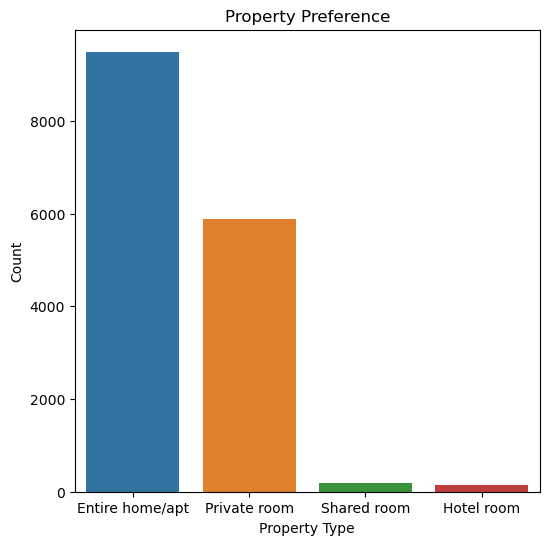

In [26]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='room_type', data=data)
p = plt.title('Property Preference')
p = plt.xlabel("Property Type")
p = plt.ylabel('Count')

#We can say most of the people actually preferred Entire house/apt rather than Hotel or shared room.
#Next was Private rooms.

In [27]:
objectcols.neighbourhood.value_counts()

Alexanderplatz                               929
Frankfurter Allee Süd FK                     869
Tempelhofer Vorstadt                         788
Reuterstraße                                 625
Brunnenstr. Süd                              618
Rixdorf                                      468
Neuköllner Mitte/Zentrum                     459
südliche Luisenstadt                         445
Prenzlauer Berg Südwest                      418
Prenzlauer Berg Nordwest                     409
Frankfurter Allee Nord                       395
Schillerpromenade                            385
Schöneberg-Nord                              380
Prenzlauer Berg Süd                          373
Moabit West                                  328
Wedding Zentrum                              312
Helmholtzplatz                               298
Schöneberg-Süd                               294
nördliche Luisenstadt                        285
Karl-Marx-Allee-Süd                          275
Moabit Ost          

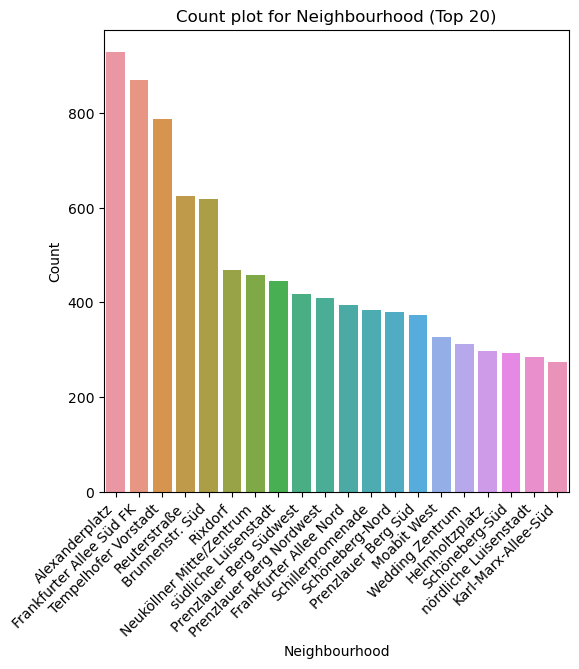

In [28]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='neighbourhood', data=data, order = data['neighbourhood'].value_counts()[:20].index)
p = plt.title('Count plot for Neighbourhood (Top 20)')
p = plt.xlabel('Neighbourhood')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# We can see Alexanderplatz was the most preferred neighbourhood
# This plot shows the top 20 neighbourhood

In [29]:
objectcols.neighbourhood_group.value_counts()

Friedrichshain-Kreuzberg    3516
Mitte                       3426
Pankow                      2480
Neukölln                    2103
Charlottenburg-Wilm.        1287
Tempelhof - Schöneberg      1066
Treptow - Köpenick           543
Lichtenberg                  463
Steglitz - Zehlendorf        362
Reinickendorf                231
Spandau                      130
Marzahn - Hellersdorf        110
Name: neighbourhood_group, dtype: int64

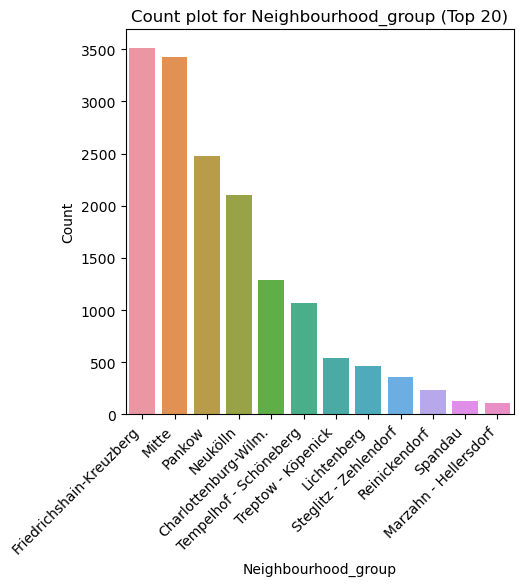

In [30]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='neighbourhood_group', data=data, order = data['neighbourhood_group']
                  .value_counts()[:20].index)
p = plt.title('Count plot for Neighbourhood_group (Top 20)')
p = plt.xlabel('Neighbourhood_group')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# We can see Friedrichshain-Kreuzberg was the most preferred neighbourhood_group
# This plot shows the top 20 neighbourhood


In [31]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15717 entries, 0 to 15716
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         15717 non-null  int64  
 1   latitude                        15717 non-null  float64
 2   longitude                       15717 non-null  float64
 3   price                           15717 non-null  int64  
 4   minimum_nights                  15717 non-null  int64  
 5   number_of_reviews               15717 non-null  int64  
 6   reviews_per_month               12755 non-null  float64
 7   calculated_host_listings_count  15717 non-null  int64  
 8   availability_365                15717 non-null  int64  
 9   number_of_reviews_ltm           15717 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.2 MB


In [32]:
numericcols.isnull().sum().sort_values(ascending=False)
#Only reviews_per_month has got missing values

reviews_per_month                 2962
host_id                              0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [33]:
numericcols.reviews_per_month.describe()

count    12755.000000
mean         0.894672
std          1.716649
min          0.010000
25%          0.080000
50%          0.300000
75%          1.090000
max         73.450000
Name: reviews_per_month, dtype: float64

In [34]:
#As it is more than 70% we impute with mean
numericcols.reviews_per_month=numericcols.reviews_per_month.fillna(numericcols.reviews_per_month.mean())

In [35]:
numericcols.price.describe()

count    15717.000000
mean       103.245658
std        946.036214
min          0.000000
25%         40.000000
50%         68.000000
75%        106.000000
max      98108.000000
Name: price, dtype: float64

/var/folders/m_/nmwrqc3j5f9dbpczh0mf3wz80000gn/T/ipykernel_1699/3182298103.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=data['price'])


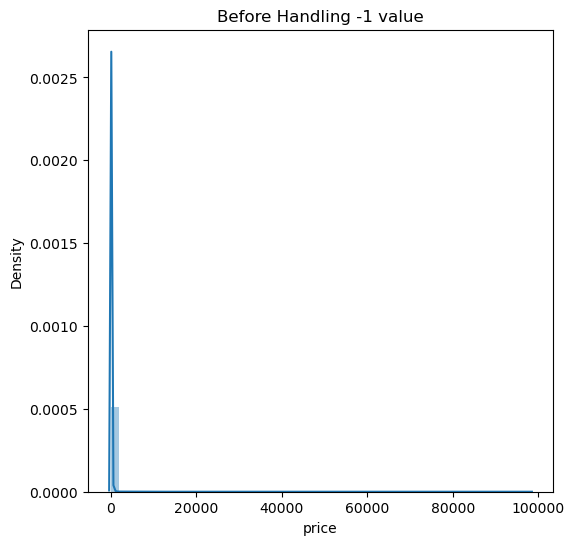

In [36]:
# Visualising 'Rating' column
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['price'])
p = plt.title('Before Handling -1 value')

Text(0, 0.5, 'price')

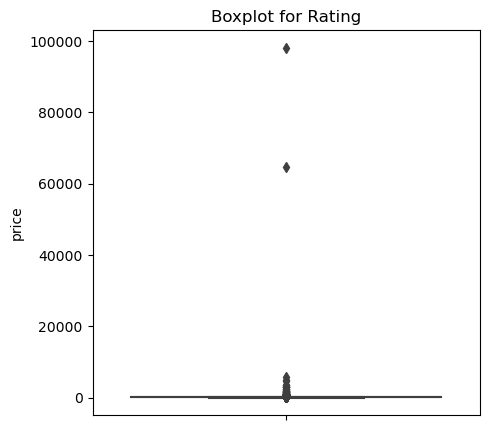

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price',data=data,orient='v')
plt.title('Boxplot for Rating')
plt.ylabel('price')

In [38]:
# **Note: There are few Outliers (Positive Skewness)

<Figure size 700x700 with 0 Axes>

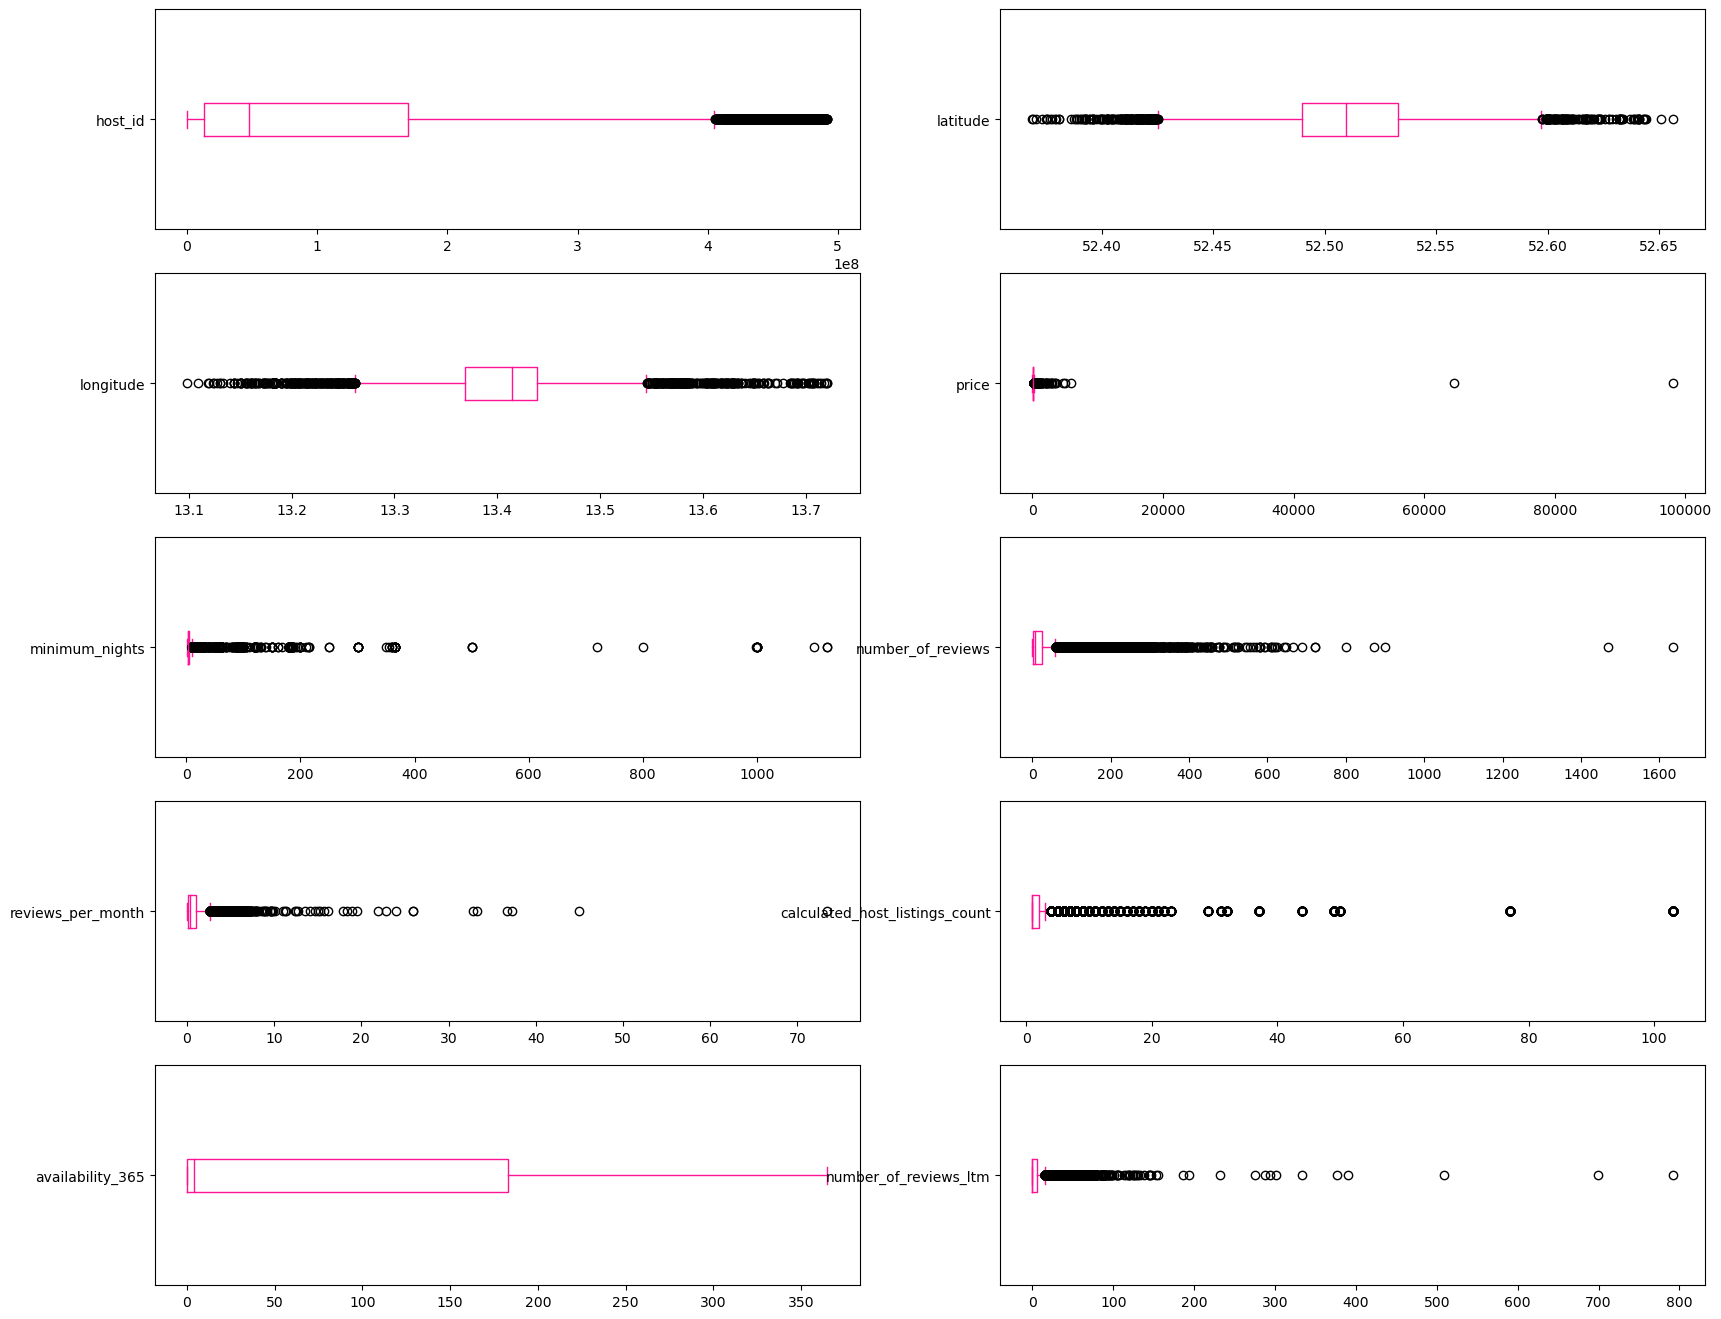

In [39]:
plt.figure(figsize=(7,7))
data.plot(kind='box', subplots=True, layout=(6,2),
sharex=False,sharey=False,figsize=(20, 20), 
color='deeppink',vert=False);

<AxesSubplot: xlabel='longitude', ylabel='price'>

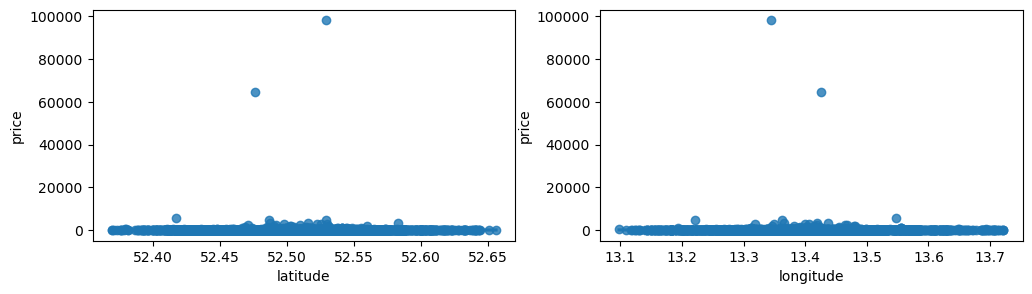

In [40]:
fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(12,3))
sns.regplot(x=data["latitude"], y=data["price"], scatter= True, fit_reg= True, ax=ax1)
sns.regplot(x=data["longitude"], y=data["price"], scatter=True, fit_reg= True, ax=ax2)


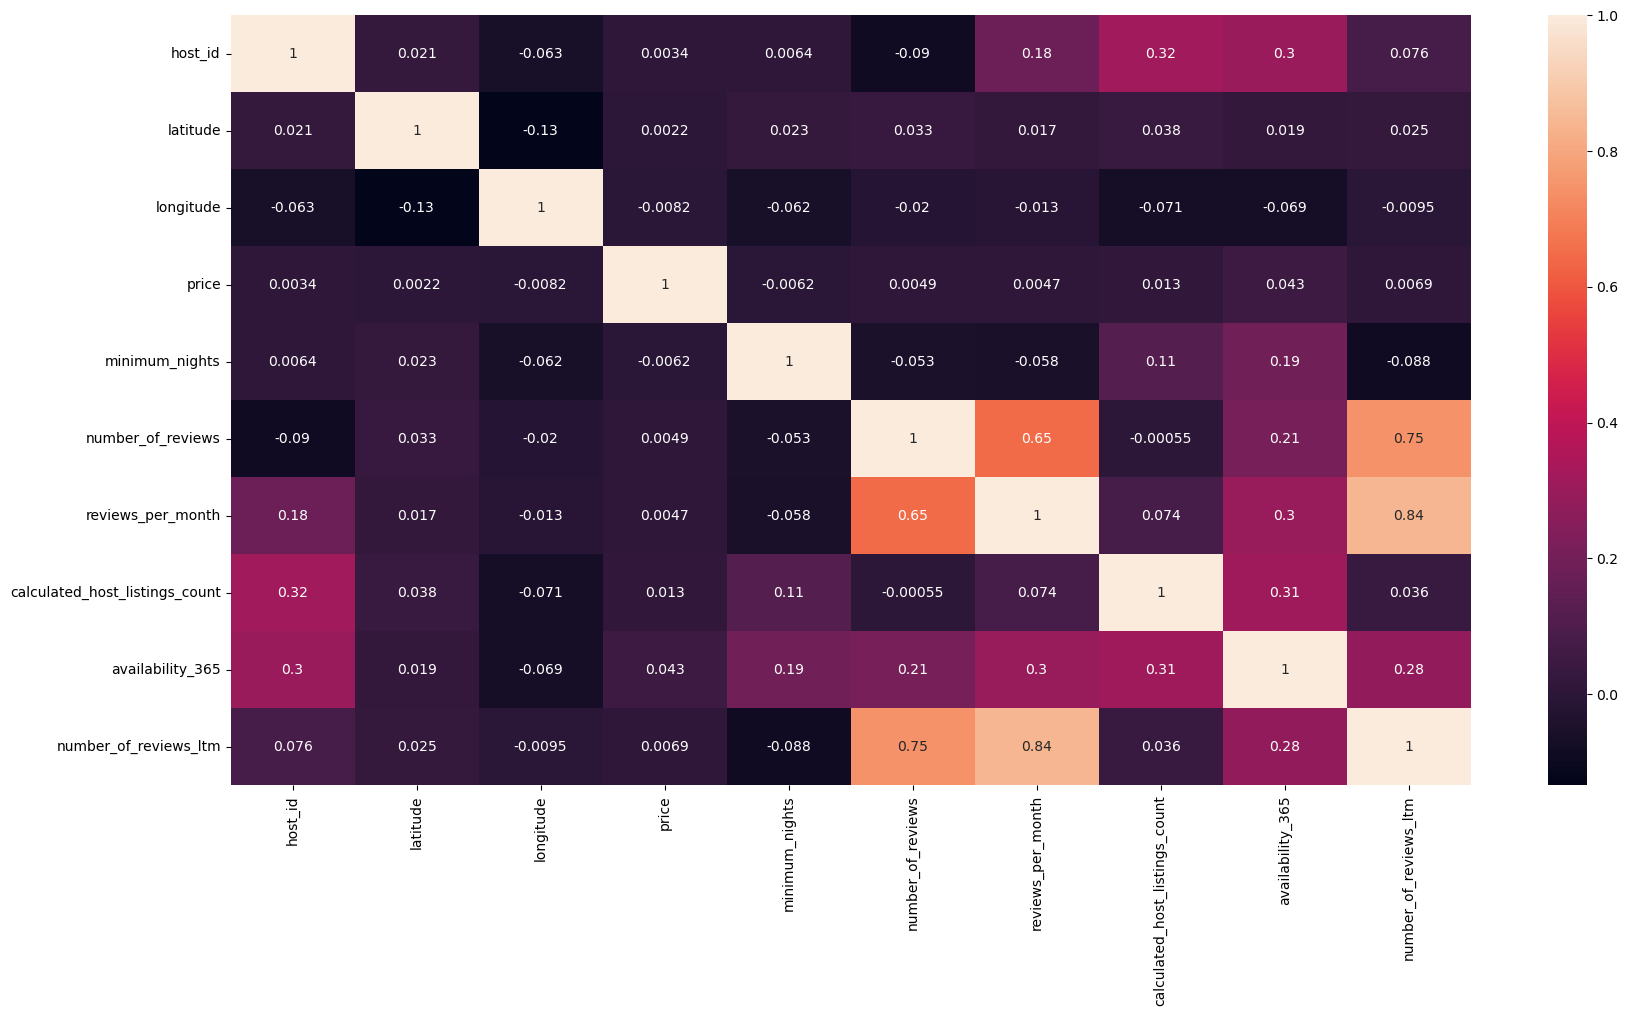

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(numericcols.corr(),annot=True)
plt.show()

In [42]:
#Reviews per month and Number of reviews are highly co-related columns
#No multicolinearity found

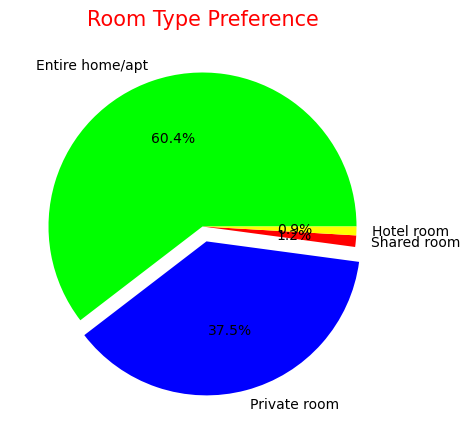

In [81]:
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0]
plt.figure(figsize = (5,5))
plt.pie(data['room_type'].value_counts().values, explode = explode, labels = data['room_type'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('Room Type Preference',color='Red',fontsize=15)
plt.show()

Room type preference for Entire home was- 60% (Most demanded room type format)

Private Room - 38%

Hotel Room - 10%

Shared Room - 1.2%


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15717 entries, 0 to 15716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            15699 non-null  object 
 1   host_id                         15717 non-null  int64  
 2   host_name                       15697 non-null  object 
 3   neighbourhood_group             15717 non-null  object 
 4   neighbourhood                   15717 non-null  object 
 5   latitude                        15717 non-null  float64
 6   longitude                       15717 non-null  float64
 7   room_type                       15717 non-null  object 
 8   price                           15717 non-null  int64  
 9   minimum_nights                  15717 non-null  int64  
 10  number_of_reviews               15717 non-null  int64  
 11  last_review                     12755 non-null  object 
 12  reviews_per_month               

In [90]:
data.neighbourhood.value_counts()[:5]

Alexanderplatz              929
Frankfurter Allee Süd FK    869
Tempelhofer Vorstadt        788
Reuterstraße                625
Brunnenstr. Süd             618
Name: neighbourhood, dtype: int64

<AxesSubplot: xlabel='minimum_nights', ylabel='neighbourhood_group'>

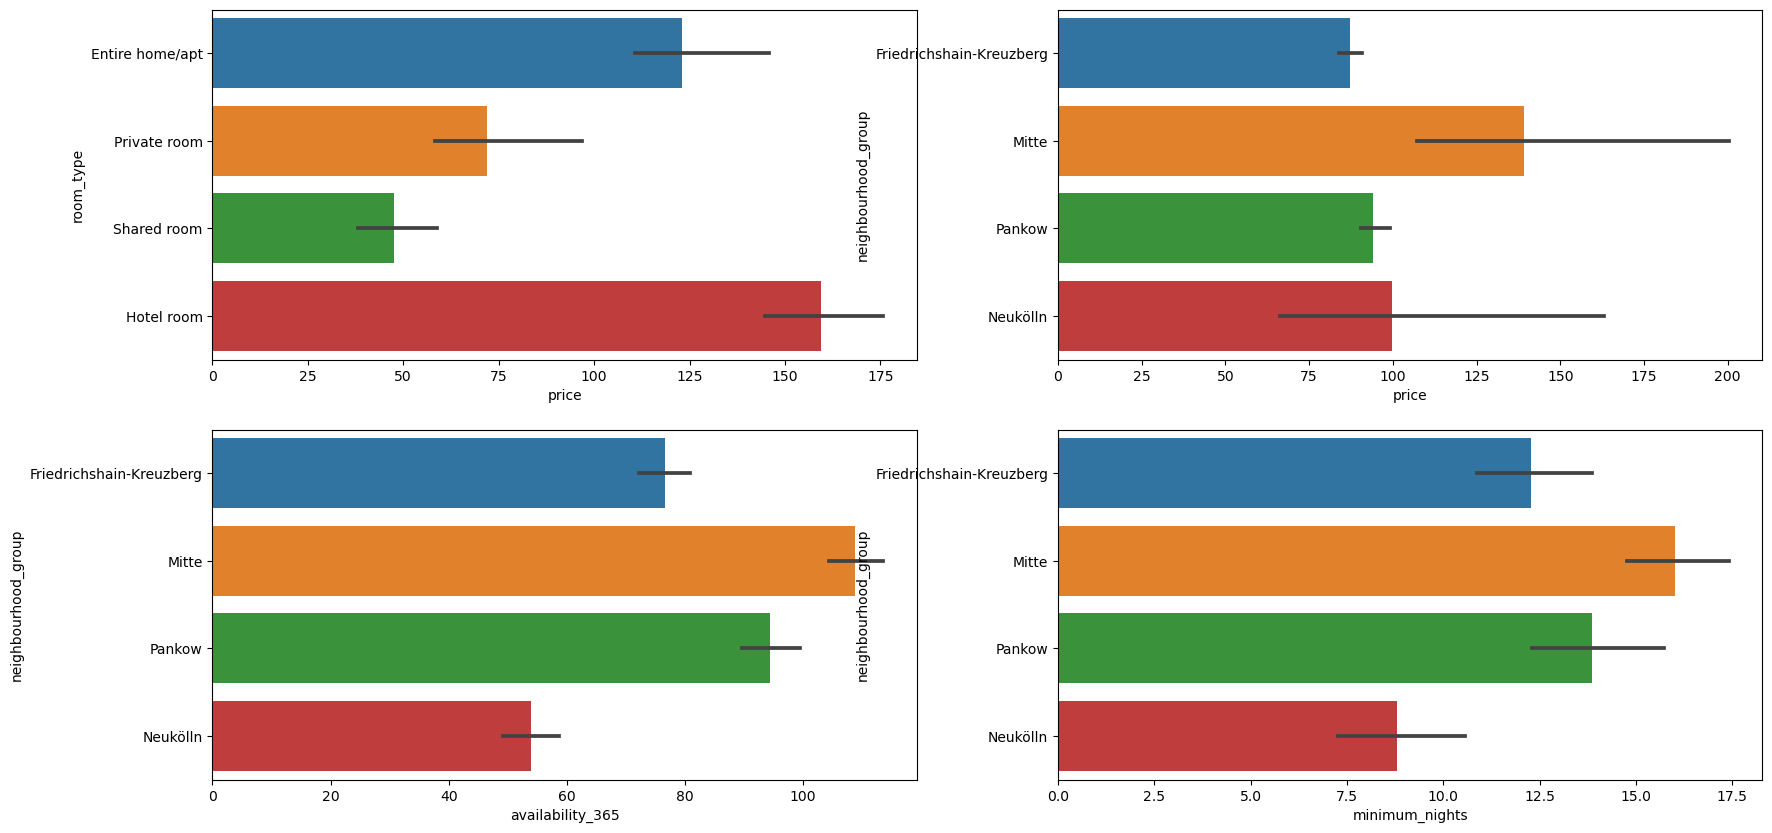

In [97]:
fig, axarr  = plt.subplots(2,2,figsize=(20,10))
sns.barplot(x='price', y='room_type', data=data, order=['Entire home/apt','Private room','Shared room',
                                                        'Hotel room'],ax=axarr[0,0])
sns.barplot(x='price',y='neighbourhood_group',data=data,order=['Friedrichshain-Kreuzberg','Mitte','Pankow',
                                                          'Neukölln'],ax=axarr[0,1])
sns.barplot(x='availability_365',y='neighbourhood_group',data=data,order=['Friedrichshain-Kreuzberg','Mitte','Pankow',
                                                          'Neukölln'],ax=axarr[1,0])
sns.barplot(x='minimum_nights',y='neighbourhood_group',data=data,order=['Friedrichshain-Kreuzberg','Mitte','Pankow',
                                                          'Neukölln'],ax=axarr[1,1])

#Room_type:
Hotel rooms were priced more compared to the entire room/apt ,maybe because of this reason most of the people preferred entire room/apt and the hotel rooms bookings were also quite less. Private room was in break even.

#Neighbourhood_group:
Most preferred (Top 3) neighborhood groups are 
Friedrichshain-Kreuzberg   
Mitte                     
Pankow 
Coming to the price mitte was priced more of the entire list,then comes Neukölln. Maybe because properties in Friedrichshain-Kreuzberg neighbourhood group are little less priced beacuse of which it is the most preferred.

#Availability_365: means the number of days the facility is available to be booked in the future 365 days.
Mitte neighbourhood group has got most availabilty compared to the other properties.

#minimum_nights : are the minimum number of nights the property has to be booked for.
This is high for the Mitte Neighborhood group



<AxesSubplot: xlabel='neighbourhood', ylabel='count'>

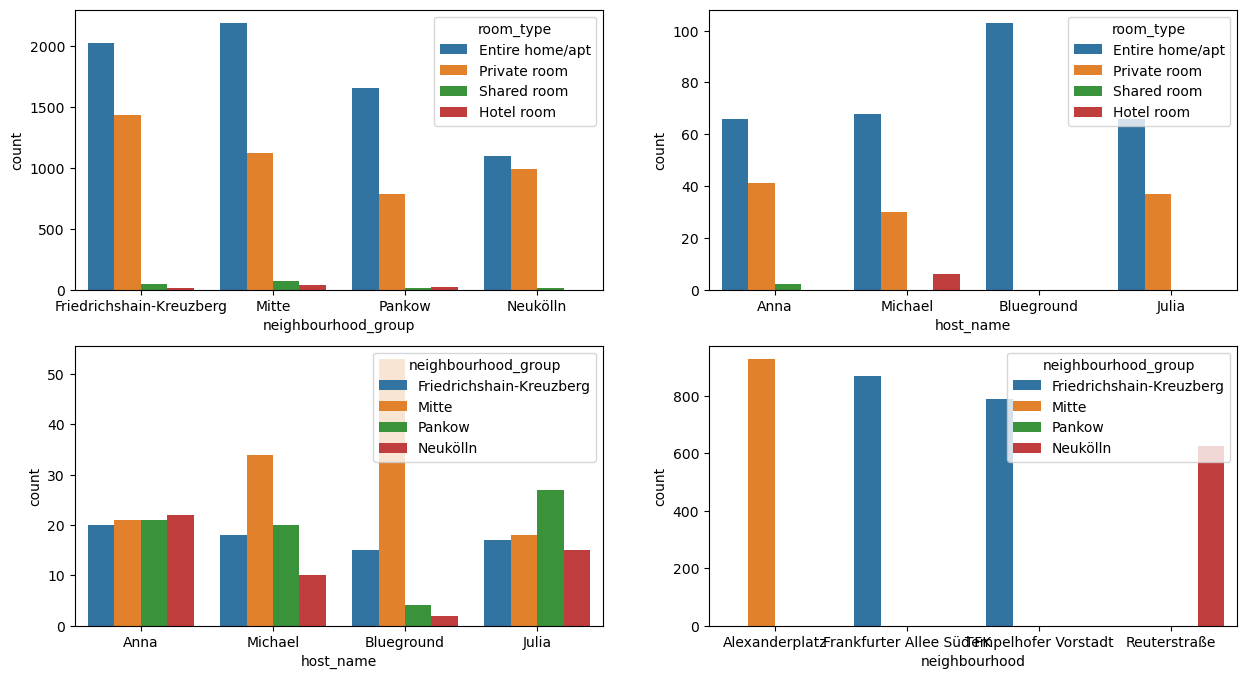

In [92]:
fig, axarr  = plt.subplots(2,2,figsize=(15,8))
sns.countplot(x='neighbourhood_group', hue='room_type', data=data, 
              ax=axarr[0,0], order=['Friedrichshain-Kreuzberg','Mitte','Pankow',
                                                          'Neukölln'], hue_order=['Entire home/apt','Private room','Shared room',
                                                        'Hotel room'])
sns.countplot(x='host_name', hue='room_type', data=data, 
              ax=axarr[0,1], order=['Anna','Michael','Blueground','Julia'], hue_order=['Entire home/apt','Private room','Shared room',
                                                        'Hotel room'])
sns.countplot(x='host_name', hue='neighbourhood_group', data=data, 
              ax=axarr[1,0], order=['Anna','Michael','Blueground','Julia'], hue_order=['Friedrichshain-Kreuzberg','Mitte','Pankow',
                                                                                       'Neukölln'])

sns.countplot(x='neighbourhood', hue='neighbourhood_group', data=data, 
              ax=axarr[1,1], order=['Alexanderplatz','Frankfurter Allee Süd FK','Tempelhofer Vorstadt','Reuterstraße'], hue_order=['Friedrichshain-Kreuzberg','Mitte','Pankow',
                                                                                       'Neukölln'])


#In Mitte neighnourhood Entire room/apt was the most booked property then comes Private room.For Private property it is Friedrichshain-Kreuzberg.

#Host Blueground has rented out the most sold Entire room/apt, we can see only this format is available from this host.Hosts Anna and Julia has equally rented out Private Room.